210157A - Epa Y. R. A.    
Github link : https://github.com/yaseemarusiru/Image_Processing_and_Machine_Vision/blob/main/EN3160_Assignment_1.ipynb

Question 1

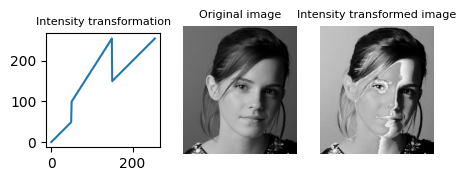

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gray_image = cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert gray_image is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
transformation = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(transformation)==256
g = cv.LUT(gray_image,transformation)

fig, ax = plt.subplots(1,3,figsize=(5,5))
ax[0].plot(transformation)
ax[0].set_title("Intensity transformation", fontsize=8), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(gray_image,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Original image", fontsize=8)
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("Intensity transformed image", fontsize=8)
plt.show()

Question 2

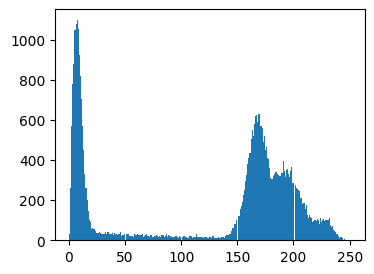

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain_image = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain_image is not None

plt.figure(figsize=(4, 3))  
plt.hist(brain_image.ravel(), bins=256) 
plt.show()

Second peak seem to be in the range 75 - 185. Third peak seem to be in the range 190 and above. So we will enhance those ranges to get greay and white matter.

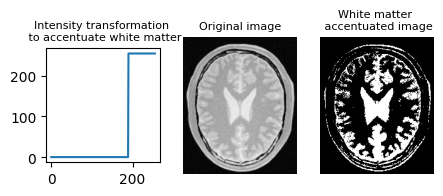

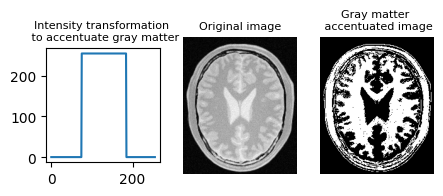

In [6]:
t1_1 = np.zeros(190)
t2_1 = 255*np.ones(66)
t3_1 = np.zeros(0)
transformation_1 = np.concatenate((t1_1,t2_1,t3_1),axis=0).astype(np.uint8)
assert len(transformation_1)==256

t1_2 = np.zeros(75)
t2_2 = 255*np.ones(110)
t3_2 = np.zeros(71)
transformation_2 = np.concatenate((t1_2,t2_2,t3_2),axis=0).astype(np.uint8)
assert len(transformation_2)==256

white_matter = cv.LUT(brain_image,transformation_1)
grey_matter = cv.LUT(brain_image,transformation_2)

fig1, ax1 = plt.subplots(1,3,figsize=(5,5))
ax1[0].plot(transformation_1)
ax1[0].set_aspect('equal')
ax1[0].set_title("Intensity transformation \n to accentuate white matter", fontsize=8)
ax1[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax1[1].axis('off')
ax1[1].set_title("Original image", fontsize=8)
ax1[2].imshow(cv.cvtColor(white_matter,cv.COLOR_BGR2RGB))
ax1[2].axis('off')
ax1[2].set_title("White matter \n accentuated image", fontsize=8)

fig2, ax2 = plt.subplots(1,3,figsize=(5,5))
ax2[0].plot(transformation_2)
ax2[0].set_aspect('equal')
ax2[0].set_title("Intensity transformation \n to accentuate gray matter", fontsize=8)
ax2[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax2[1].axis('off')
ax2[1].set_title("Original image", fontsize=8)
ax2[2].imshow(cv.cvtColor(grey_matter,cv.COLOR_BGR2RGB))
ax2[2].axis('off')
ax2[2].set_title("Gray matter \n accentuated image", fontsize=8)
plt.show()

Question 3

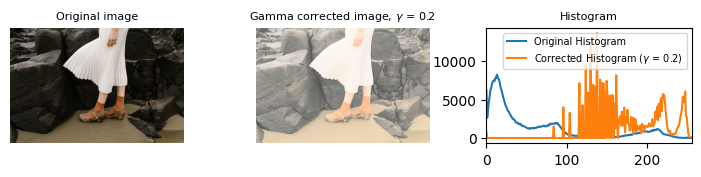

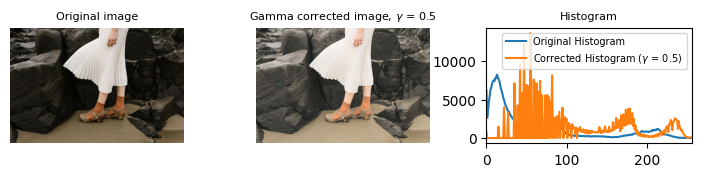

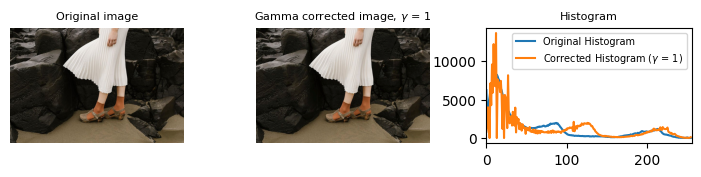

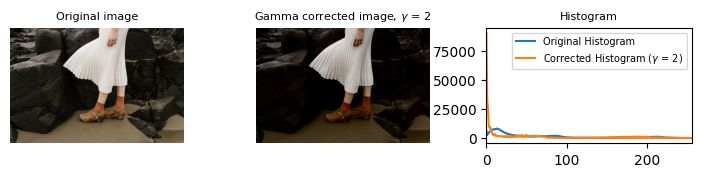

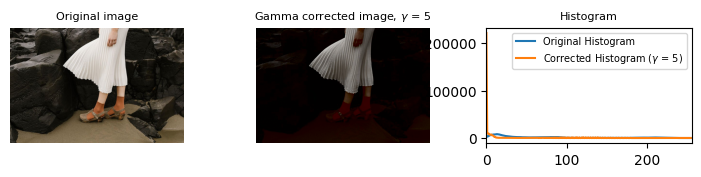

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gamma = [0.2, 0.5, 1, 2, 5]

f = cv.imread("a1images/highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(f, cv.COLOR_BGR2LAB))

for g in gamma:
    t = np.array([(i/255.0)**(g)*255 for i in np.arange(0,256)]).astype(np.uint8)
    corrected = cv.LUT(L, t)

    fig, ax = plt.subplots(1, 3, figsize=(9,1.5))
    ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original image', fontsize=8)
    ax[0].axis('off')
    ax[1].imshow(cv.cvtColor(cv.merge([corrected, a, b]),cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected image, $\\gamma$ = {}'.format(g), fontsize=8)
    ax[1].axis('off')
    ax[2].plot(cv.calcHist([f],[0],None,[256],[0,256]), label='Original Histogram')
    ax[2].plot(cv.calcHist([cv.merge([corrected, a, b])],[0],None,[256],[0,256]) , label=f'Corrected Histogram ($\\gamma$ = {g})')
    ax[2].set_xlim([0, 256])
    ax[2].set_title('Histogram', fontsize=8)
    ax[2].legend(fontsize=7)
    plt.show()

When gamma value is less than 1, brightness of the image increases for lesser gamma. When gamma value is greater than 1, brightness of the image decreases with increasing gamma. We can see this in histogram too. When darkness increases, histogram of the gamma corrected image moves to the left.

Question 4

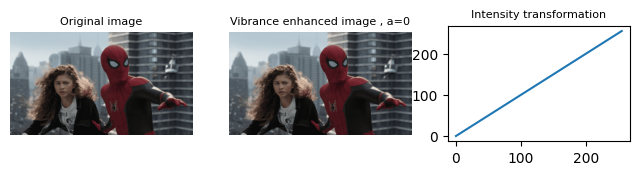

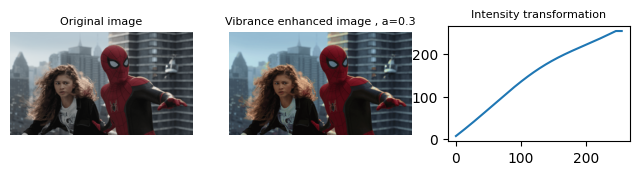

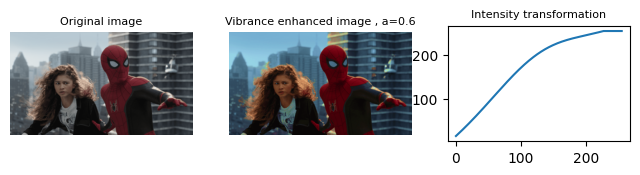

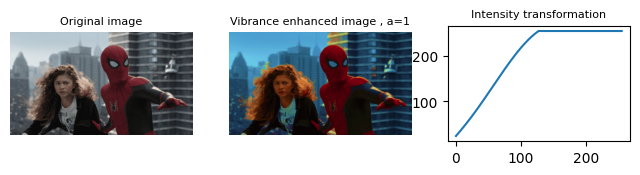

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images/spider.png')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(img_hsv)  #splitting the image into hue, saturation, and value channels

a_s = [0, 0.3, 0.6, 1]

for a in a_s:
    transformation = np.minimum(saturation+a*128*np.exp(-((saturation-128)**2)/(2*70**2)),255).astype('uint8')
    img_hsv_transformed = cv.merge([hue, transformation, value])

    fig, ax = plt.subplots(1, 3, figsize=(8,1.5))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))    # Original image
    ax[0].set_title('Original image', fontsize=8)
    ax[0].axis('off')
    ax[1].imshow(cv.cvtColor(cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2BGR), cv.COLOR_BGR2RGB)) # Vibrance-enhanced image
    ax[1].set_title(f'Vibrance enhanced image , a={a}', fontsize=8)
    ax[1].axis('off')
    x_values = np.arange(0, 256)    # Intensity transformation plot
    y_values = np.minimum(x_values+a*128*np.exp(-((x_values-128)**2)/(2*70**2)), 255)
    ax[2].plot(x_values, y_values)
    ax[2].set_title('Intensity transformation', fontsize=8)
    plt.show()

We can see a visually pleasing output when a = 0.6

Question 5

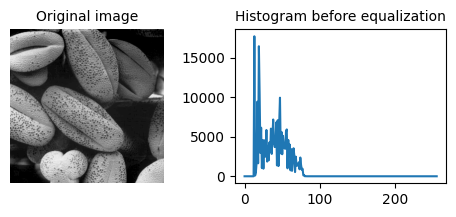

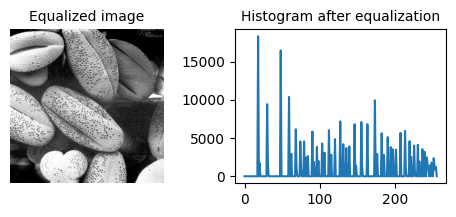

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

hist, bins = np.histogram(img.flatten(),256,[0,256])
pdf = hist/float(np.sum(hist))
cdf = pdf.cumsum()
cdf_normalized = cdf*255/cdf[-1]
img_equalized = np.interp(img.flatten(),bins[:-1],cdf_normalized).reshape(img.shape).astype('uint8')
hist_equalized, bins_equalized = np.histogram(img_equalized.flatten(),256,[0,256])

fig, ax = plt.subplots(1,2,figsize=(6,2))
ax[0].imshow(img, cmap='gray')  # Original image
ax[0].set_title('Original image', fontsize=10)
ax[0].axis('off')
ax[1].plot(hist)    # Histogram of original image
ax[1].set_title('Histogram before equalization', fontsize=10)

fig, ax = plt.subplots(1,2,figsize=(6,2))
ax[0].imshow(img_equalized, cmap='gray')    # Equalized image
ax[0].set_title('Equalized image', fontsize=10)
ax[0].axis('off')
ax[1].plot(hist_equalized)  # Histogram of equalized image
ax[1].set_title('Histogram after equalization', fontsize=10)
plt.show()

Question 6  (a)

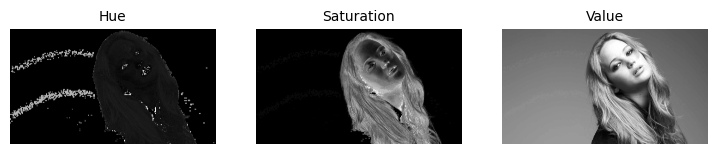

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images/jeniffer.jpg')
assert img is not None

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 3, figsize=(9,1.5))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue', fontsize=10)
ax[0].axis('off')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation', fontsize=10)
ax[1].axis('off')
ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value', fontsize=10)
ax[2].axis('off')
plt.show()

(b) Saturation plane seem to differentiate forebround and background more. So I am using saturation plane to extract the foreground mask.

After some trial and error, I found that threshold 11 differentiates foreground and background more clearly.

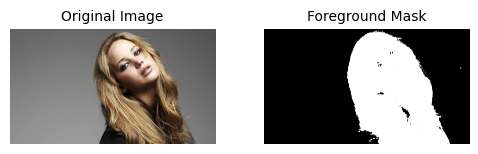

In [11]:
_, mask = cv.threshold(saturation, 11, 256, cv.THRESH_BINARY)

fig, ax = plt.subplots(1, 2, figsize=(6,1.5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize=10)
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Foreground Mask', fontsize=10)
ax[1].axis('off')
plt.show()

(c)

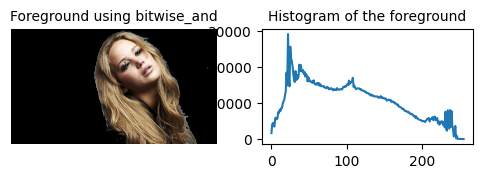

In [12]:
foreground = cv.bitwise_and(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(img, cv.COLOR_BGR2RGB), mask=mask)

foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)    # histogram computation
hist, bins = np.histogram(foreground_gray[mask > 0], 256, [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(6,1.5))
ax[0].imshow(foreground)
ax[0].set_title('Foreground using bitwise_and', fontsize=10)
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram of the foreground', fontsize=10)
plt.show()

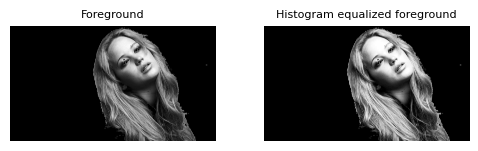

In [13]:
# (d)
cdf = hist.cumsum()
# (e)
M, N = foreground_gray.shape
L = 256
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
foreground_equalized = t[foreground_gray]
fig, ax = plt.subplots(1,2, figsize=(6,1.5))
ax[0].imshow(foreground_gray, cmap= 'gray')
ax[0].set_title('Foreground', fontsize=8)
ax[0].axis('off')
ax[1].imshow(foreground_equalized, cmap='gray')
ax[1].set_title('Histogram equalized foreground', fontsize=8)
ax[1].axis('off')
plt.show()

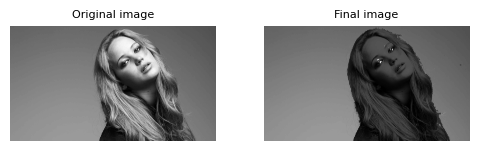

In [14]:
background = cv.bitwise_and(img, img, mask=cv.bitwise_not(mask))  # Extract background
background_gray = cv.cvtColor(background, cv.COLOR_BGR2GRAY)
final_image = cv.add(background_gray, foreground_equalized)

fig, ax = plt.subplots(1,2, figsize=(6,1.5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY), cmap= 'gray')
ax[0].set_title('Original image', fontsize=8)
ax[0].axis('off')
ax[1].imshow(final_image, cmap='gray')
ax[1].set_title('Final image', fontsize=8)
ax[1].axis('off')
plt.show()

Question 7  (a)

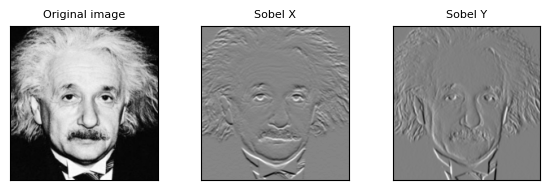

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(7,2))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original image', fontsize=8)
ax[1].imshow(im_x, cmap='gray')
ax[1].set_title('Sobel X', fontsize=8)
ax[1].set_xticks([]), ax[0].set_yticks([])
ax[2].imshow(im_y, cmap='gray')
ax[2].set_title('Sobel Y', fontsize=8)
ax[2].set_xticks([]), ax[1].set_yticks([])
plt.show()

(b)

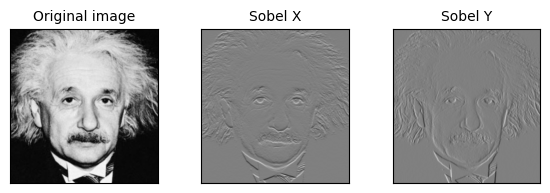

In [16]:
import cv2 as cv
import numpy as np

img = cv.imread("a1images/einstein.png")
assert im is not None

img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)
my_sobel_x = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
my_sobel_y = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

fig, ax = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(7,2))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original image', fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(my_sobel_y, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Sobel X', fontsize=10)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(my_sobel_x, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title('Sobel Y', fontsize=10)
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

(c)

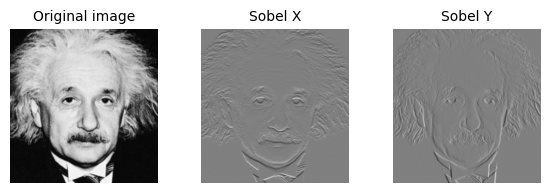

In [17]:
import cv2 as cv
import numpy as np

im = cv.imread("a1images/einstein.png")
assert im is not None
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)
sobel_h_kernel = np.array([1,2,1], dtype=np.float32)
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32)
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

fig, ax = plt.subplots(1,3, figsize=(7,2))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255),
ax[0].set_title("Original image", fontsize=10)
ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel X", fontsize=10)
ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel Y", fontsize=10)
ax[2].axis("off")
plt.show()

Question 8

Nearest-neighbor normalized SSD: 136.26904899691357
Bilinear interpolation normalized SSD: 115.0919012024177


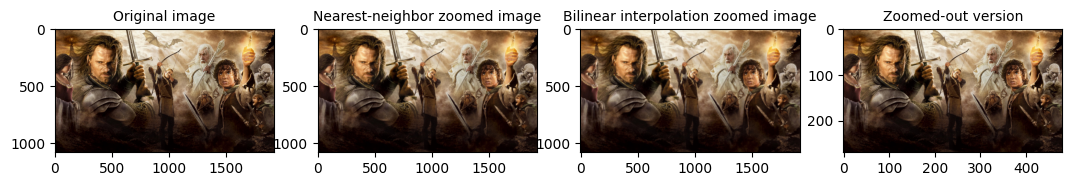

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original_img1 = cv.imread("a1images/a1q5images/im01.png")	# ---- Image 1 ------
zoomed_out_img1 = cv.imread("a1images/a1q5images/im01small.png")
near_img = cv.resize(zoomed_out_img1, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST) # Nearest-neighbor
bilinear_img = cv.resize(zoomed_out_img1, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)  # Bilinear interpolation

ssd_nearest = (np.sum((original_img1.astype("float") - near_img.astype("float")) ** 2)) / original_img1.size    # SSD between the original and zoomed-up images
ssd_bilinear = (np.sum((original_img1.astype("float") - bilinear_img.astype("float")) ** 2)) / original_img1.size 
print(f"Nearest-neighbor normalized SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(13,7))
ax[0].imshow(cv.cvtColor(original_img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image", fontsize=10)
ax[1].imshow(cv.cvtColor(near_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image", fontsize=10)
ax[2].imshow(cv.cvtColor(bilinear_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image", fontsize=10)
ax[3].imshow(cv.cvtColor(zoomed_out_img1, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version", fontsize=10)
plt.show()

Nearest-neighbor normalized SSD: 26.446087384259258
Bilinear interpolation normalized SSD: 18.34591767939815


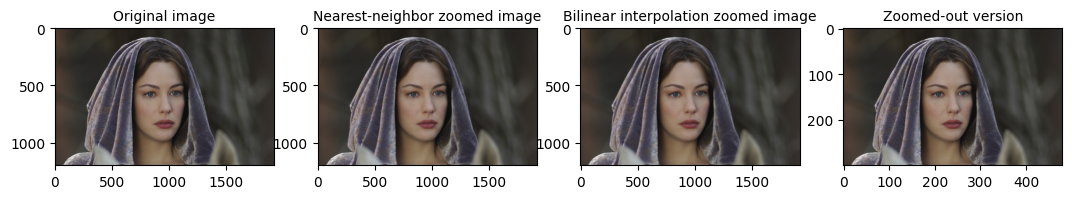

In [19]:
original_img2 = cv.imread("a1images/a1q5images/im02.png")	# ---- Image 2 ------
zoomed_out_img2 = cv.imread("a1images/a1q5images/im02small.png")
near_img2 = cv.resize(zoomed_out_img2, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)    # Nearest-neighbor
bilinear_img2 = cv.resize(zoomed_out_img2, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR) # Bilinear interpolation

ssd_nearest = (np.sum((original_img2.astype("float") - near_img2.astype("float")) ** 2)) / original_img2.size   # SSD between the original and zoomed-up images
ssd_bilinear = (np.sum((original_img2.astype("float") - bilinear_img2.astype("float")) ** 2)) / original_img2.size 
print(f"Nearest-neighbor normalized SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(13,7))
ax[0].imshow(cv.cvtColor(original_img2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image", fontsize=10)
ax[1].imshow(cv.cvtColor(near_img2, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image", fontsize=10)
ax[2].imshow(cv.cvtColor(bilinear_img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image", fontsize=10)
ax[3].imshow(cv.cvtColor(zoomed_out_img2, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version", fontsize=10)
plt.show()

Bilinear interpolation provides good results compared with nearest neighbor.

Question 9  (a)

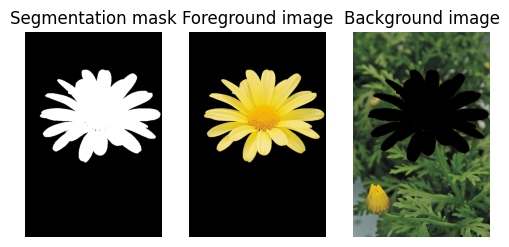

In [20]:
#Question 7 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("a1images/daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)
background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)
rectangle = (50,50,505,505)

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask1[:,:,np.newaxis]
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(1,3, figsize = (6,6))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation mask")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground image")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background image")
ax[2].axis("off")
plt.show()

(b)

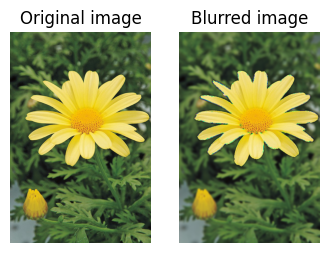

In [21]:
fig, ax = plt.subplots(1,2, figsize = (4,4))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[0].axis("off")
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0)
ax[1].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Blurred image")
ax[1].axis("off")
plt.show()

(c) When the blurred backgrond and the foreground image are added, the edges of the flower and dark blurred background adds up. This is the reason for the dark edges of the flower.